
# Real-Time Network Traffic Visualization

This notebook demonstrates how to use **Plotly** to visualize real-time network traffic trends, including upload/download speeds, latency, and geographical data.
    

In [1]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import time


In [2]:

# Simulate real-time network traffic data
np.random.seed(42)

def generate_network_data():
    return {
        'Timestamp': pd.Timestamp.now(),
        'Upload_Speed_MBps': np.random.uniform(5, 50),
        'Download_Speed_MBps': np.random.uniform(10, 100),
        'Latency_ms': np.random.uniform(1, 20),
        'Location': np.random.choice(['New York', 'San Francisco', 'London', 'Tokyo', 'Sydney'])
    }

# Generate initial dataset
network_data = pd.DataFrame([generate_network_data() for _ in range(10)])
network_data


,Timestamp,Upload_Speed_MBps,Download_Speed_MBps,Latency_ms,Location
0,2024-12-14 14:11:45.715805,21.854305,95.564288,14.907885,Sydney
1,2024-12-14 14:11:45.716077,31.858257,50.124948,2.899523,London
2,2024-12-14 14:11:45.716149,43.977927,64.100351,14.453379,Sydney
3,2024-12-14 14:11:45.717202,48.645943,84.919838,5.034443,Tokyo
4,2024-12-14 14:11:45.717306,13.253203,37.381802,10.970372,Tokyo
5,2024-12-14 14:11:45.717489,6.037809,57.229719,8.597358,Tokyo
6,2024-12-14 14:11:45.717536,48.818998,30.949421,2.721522,London
7,2024-12-14 14:11:45.717570,22.210790,98.490780,9.868495,Sydney
8,2024-12-14 14:11:45.717602,32.339518,25.347171,2.235980,Tokyo
9,2024-12-14 14:11:45.717646,47.399079,60.695940,8.322914,San Francisco


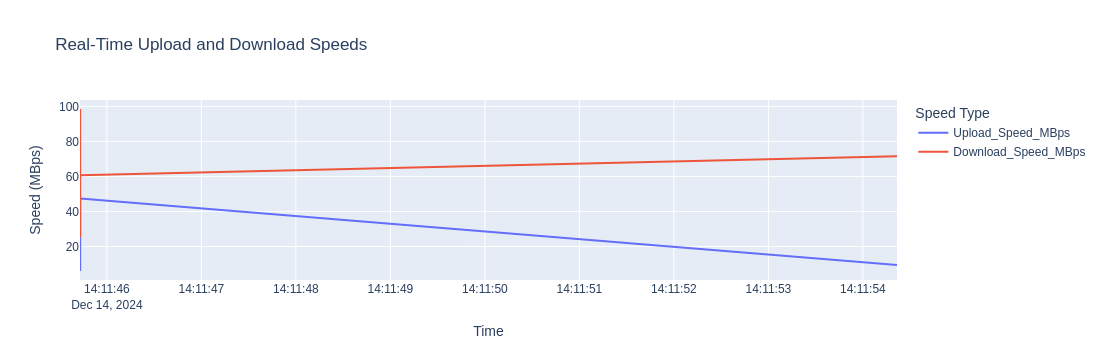

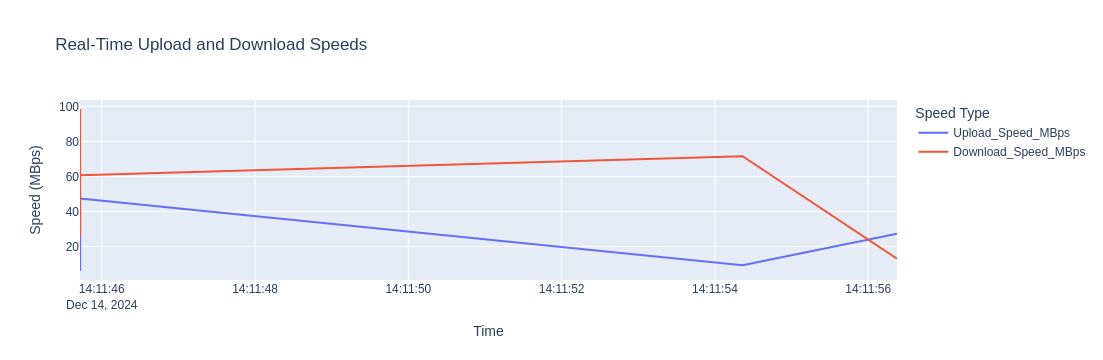

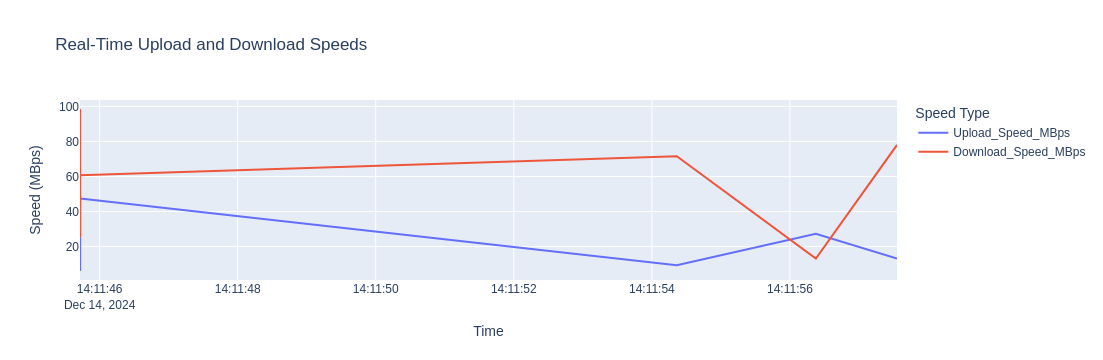

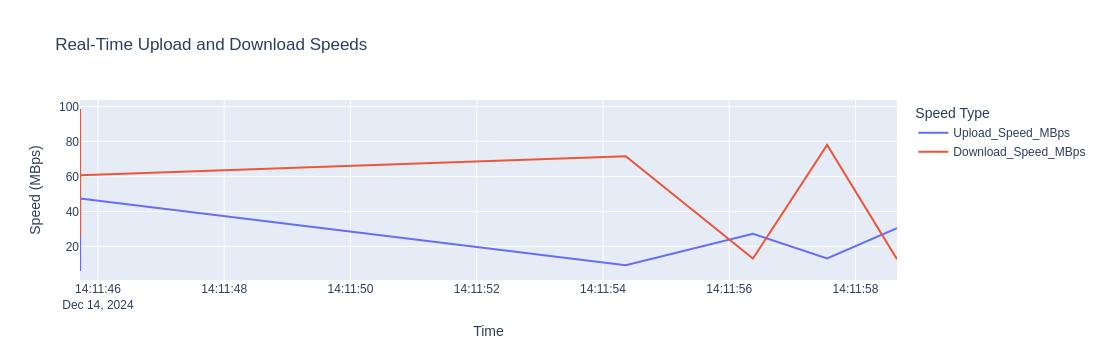

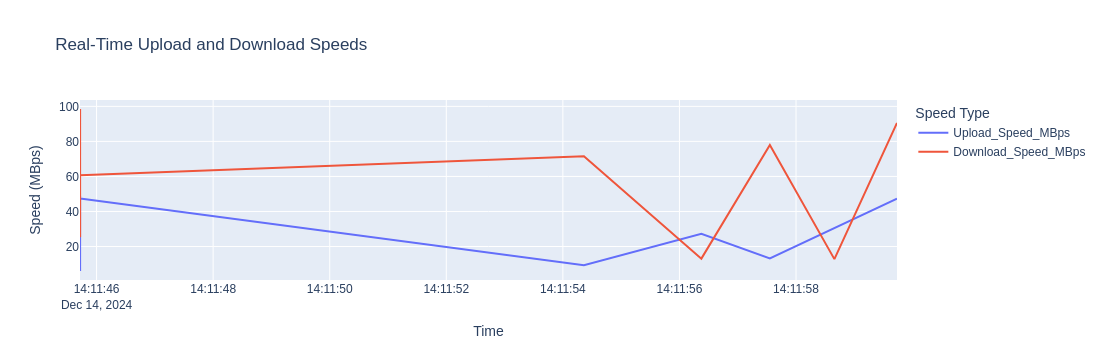

In [3]:

# Real-time Line Chart: Upload/Download Speeds Over Time
def update_line_chart(dataframe):
    fig = px.line(dataframe, x='Timestamp', y=['Upload_Speed_MBps', 'Download_Speed_MBps'],
                  labels={'value': 'Speed (MBps)', 'Timestamp': 'Time'},
                  title='Real-Time Upload and Download Speeds')
    fig.update_layout(legend_title_text='Speed Type')
    fig.show()

# Simulate updates every second
for _ in range(5):
    new_row = generate_network_data()
    network_data = pd.concat([network_data, pd.DataFrame([new_row])], ignore_index=True)
    update_line_chart(network_data)
    time.sleep(1)


In [4]:

# Heatmap: Latency by Location
def plot_heatmap(dataframe):
    aggregated_data = dataframe.groupby('Location')['Latency_ms'].mean().reset_index()
    fig = px.density_heatmap(aggregated_data, x='Location', y='Latency_ms', 
                             labels={'Latency_ms': 'Average Latency (ms)', 'Location': 'City'},
                             title='Average Latency by Location')
    fig.show()

plot_heatmap(network_data)


In [6]:

# Geographical Visualization: Traffic Locations
def plot_geo(dataframe):
    location_lat_lon = {
        'New York': (40.7128, -74.0060),
        'San Francisco': (37.7749, -122.4194),
        'London': (51.5074, -0.1278),
        'Tokyo': (35.6895, 139.6917),
        'Sydney': (-33.8688, 151.2093)
    }
    dataframe['Latitude'] = dataframe['Location'].map(lambda x: location_lat_lon[x][0])
    dataframe['Longitude'] = dataframe['Location'].map(lambda x: location_lat_lon[x][1])

    fig = px.scatter_geo(dataframe, lat='Latitude', lon='Longitude', color='Latency_ms',
                         size='Download_Speed_MBps', hover_name='Location',
                         title='Geographical Network Traffic Visualization',
                         labels={'Latency_ms': 'Latency (ms)', 'Download_Speed_MBps': 'Download Speed (MBps)'})
    fig.update_geos(projection_type="natural earth")
    fig.show()

plot_geo(network_data)


In [7]:

# Pie Chart: Bandwidth Usage by Location
def plot_pie_chart(dataframe):
    aggregated_data = dataframe.groupby('Location')['Download_Speed_MBps'].sum().reset_index()
    fig = px.pie(aggregated_data, values='Download_Speed_MBps', names='Location',
                 title='Bandwidth Usage by Location',
                 labels={'Download_Speed_MBps': 'Total Download Speed (MBps)', 'Location': 'City'})
    fig.show()

plot_pie_chart(network_data)
